<a href="https://colab.research.google.com/github/Jonnytan555/ML_for_Finance/blob/main/Trading_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
df = pd.read_csv('Facebook.csv')

In [ ]:
df = pd.read_csv('Facebook.csv')
df.columns = df.columns.str.strip()
df = df[['ref.date','price.close']] #only need closed price and date

In [ ]:
df.head(10)

,ref.date,price.close
0,17/08/2018,173.800003
1,16/08/2018,174.699997
2,15/08/2018,179.529999
3,14/08/2018,181.110001
4,13/08/2018,180.050003
5,10/08/2018,180.259995
6,09/08/2018,183.089996
7,08/08/2018,185.179993
8,07/08/2018,183.809998
9,06/08/2018,185.690002


In [ ]:
#Part 2: Calculate the inputs that go into the model like the 200sma and 50sma

df['% change'] = df['price.close'].pct_change() #daily percent change
df['200 sma'] = df['price.close'].rolling(window=200).mean().round(5) #200 day moving average
df['50 sma'] = df['price.close'].rolling(window=50).mean().round(5) #200 day moving average


,ref.date,price.close,% change,200 sma,50 sma
0,17/08/2018,173.800003,NaN,NaN,NaN
1,16/08/2018,174.699997,0.005178,NaN,NaN
2,15/08/2018,179.529999,0.027647,NaN,NaN
3,14/08/2018,181.110001,0.008801,NaN,NaN
4,13/08/2018,180.050003,-0.005853,NaN,NaN
...,...,...,...,...,...
247,24/08/2017,167.740005,0.008538,176.57620,171.9478
248,23/08/2017,168.710007,0.005783,176.46205,171.7436
249,22/08/2017,169.639999,0.005512,176.36475,171.4832
250,21/08/2017,167.779999,-0.010964,176.26275,171.2376


In [ ]:
#Part 3: Set Models Criteria

df['Criteria 1'] = df['price.close'] >= df['200 sma']
df['Criteria 2'] = (df['50 sma'] >= df['200 sma']) | df['Criteria 1'] == True

df.head()

,ref.date,price.close,% change,200 sma,50 sma,Criteria 1,Criteria 2
0,17/08/2018,173.800003,NaN,NaN,NaN,False,False
1,16/08/2018,174.699997,0.005178,NaN,NaN,False,False
2,15/08/2018,179.529999,0.027647,NaN,NaN,False,False
3,14/08/2018,181.110001,0.008801,NaN,NaN,False,False
4,13/08/2018,180.050003,-0.005853,NaN,NaN,False,False


In [ ]:
#Part 4: Calculate the models 

#Buy and hold chnages over time keeping 100 as the starting point
df['Buy and hold'] = 100*(1+df['% change']).cumprod()

#model 1 changes based on whether the models criteria is met or not
df['200 sma model'] = 100*(1+df['Criteria 1'].shift(1)*df['% change']).cumprod()

#model 2 changes based on whether the models criteria is met or not
df['200 sma + crossover model'] = 100*(1+df['Criteria 2'].shift(1)*df['% change']).cumprod()
df.head()

,ref.date,price.close,% change,200 sma,50 sma,Criteria 1,Criteria 2,Buy and hold,200 sna model,200 sna + crossover model,200 sma model,200 sma + crossover model
0,17/08/2018,173.800003,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN
1,16/08/2018,174.699997,0.005178,NaN,NaN,False,False,100.517833,100,100,100,100
2,15/08/2018,179.529999,0.027647,NaN,NaN,False,False,103.296891,100,100,100,100
3,14/08/2018,181.110001,0.008801,NaN,NaN,False,False,104.205983,100,100,100,100
4,13/08/2018,180.050003,-0.005853,NaN,NaN,False,False,103.596087,100,100,100,100


In [ ]:
#Part 5: Calculate the model's returns

#200 sma model's return 
start_model1 = df['200 sma model'].iloc[200]# we did 200 calulations earlier, values only start from 200th position
end_model1 = df['200 sma model'].iloc[-1] # last value in column 
years = (df['200 sma model'].count()+1-200)/252 # number of years we are calculating on. Takes into account 252 trading days
model1_average_returns = (end_model1/start_model1)**(1/years)-1 # model average returns
print('200 sma model yields and average of', model1_average_returns*100, '% per year')

#200 sma + crossover model's return 
start_model2 = df['200 sma + crossover model'].iloc[200]# we did 200 calulations earlier, values only start from 200th position
end_model2 = df['200 sma + crossover model'].iloc[-1] # last value in column 
model2_average_returns = (end_model2/start_model2)**(1/years)-1 # model average returns
print('200 sma + crossover model yields and average of', model2_average_returns*100, '% per year')

#buy and hold's return 
start_spx = df['price.close'].iloc[200]# we did 200 calulations earlier, values only start from 200th position
end_spx = df['price.close'].iloc[-1] # last value in column 
spx_average_returns = (end_spx/start_spx)**(1/years)-1 # model average returns
print('spx model yields and average of', spx_average_returns*100, '% per year')

200 sma model yields and average of 0.0 % per year
200 sma + crossover model yields and average of 0.0 % per year
spx model yields and average of -29.743278400536475 % per year


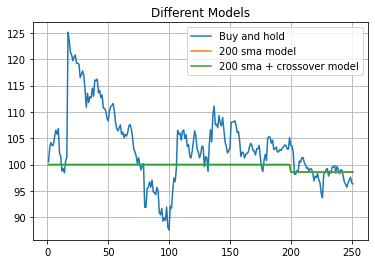

In [ ]:
#Part 6: Plot the models

df[['Buy and hold', '200 sma model', '200 sma + crossover model']].plot(grid=True, kind = 'line', title='Different Models')